In [1]:
!git clone https://github.com/hehehe23/tasse.git

Cloning into 'tasse'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [2]:
!tar -zxvf /content/tasse/file.tar.gz

home/xxx/tasse/data/
home/xxx/tasse/data/135/
home/xxx/tasse/data/135/TKQNU96M.jpg
tar: home/xxx/tasse/data/135/TKQNU96M.jpg: time stamp 2021-01-04 08:59:29 is 2341.378797236 s in the future
home/xxx/tasse/data/135/W2JZBQ14.jpg
tar: home/xxx/tasse/data/135/W2JZBQ14.jpg: time stamp 2021-01-04 08:59:29 is 2341.378628639 s in the future
home/xxx/tasse/data/135/GI67SLPI.jpg
tar: home/xxx/tasse/data/135/GI67SLPI.jpg: time stamp 2021-01-04 08:59:29 is 2341.378550069 s in the future
home/xxx/tasse/data/135/T6M0ATF8.jpg
tar: home/xxx/tasse/data/135/T6M0ATF8.jpg: time stamp 2021-01-04 08:59:29 is 2341.378468783 s in the future
home/xxx/tasse/data/135/Q1T69Y5Z.jpg
tar: home/xxx/tasse/data/135/Q1T69Y5Z.jpg: time stamp 2021-01-04 08:59:29 is 2341.378408742 s in the future
home/xxx/tasse/data/135/B61CIZVL.jpg
tar: home/xxx/tasse/data/135/B61CIZVL.jpg: time stamp 2021-01-04 08:59:29 is 2341.378352409 s in the future
home/xxx/tasse/data/135/FANFOJ5X.jpg
tar: home/xxx/tasse/data/135/FANFOJ5X.jpg: time

In [4]:
!rm -rf home/
!rm -rf tasse/

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [6]:
data_path = '/content/data'

batch_size = 64
size = 80

In [7]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split = 0.2,
  subset = "training",
  seed = 666,
  image_size = (size, size),
  batch_size = batch_size)

val = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split = 0.2,
  subset = "validation",
  seed = 666,
  image_size = (size, size),
  batch_size = batch_size)

class_names = train.class_names
print(class_names)

Found 360 files belonging to 8 classes.
Using 288 files for training.
Found 360 files belonging to 8 classes.
Using 72 files for validation.
['135', '180', '225', '270', '315', '360', '45', '90']


(64, 80, 80, 3)
(64,)


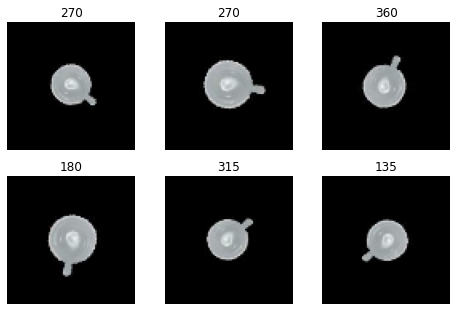

In [8]:


plt.figure(figsize = (8, 8))
for images, labels in train.take(1):
  for x in range(6):
    ax = plt.subplot(3, 3, x + 1)
    plt.imshow(images[x].numpy().astype("uint8"))
    plt.title(class_names[labels[x]])
    plt.axis("off")

for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break



In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val = val.cache().prefetch(buffer_size = AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential()

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1. / 255, input_shape=(size, size, 3)),
  layers.Conv2D(16, 3, padding='same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dropout(0.5),
  layers.Dense(len(class_names), activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)       

In [11]:
model.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                                                                metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.25,
                              patience = 5, min_lr = 0.001)

In [12]:

epochs = 20

hist = model.fit(
  train,
  validation_data = val,
  epochs = epochs,
  callbacks=[reduce_lr])

Epoch 1/20
5/5 [==============================] - 8s 131ms/step - loss: 2.0658 - accuracy: 0.1937 - val_loss: 2.0189 - val_accuracy: 0.5972
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 1.9405 - accuracy: 0.3456 - val_loss: 1.8426 - val_accuracy: 0.4722
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 1.7232 - accuracy: 0.4331 - val_loss: 1.3234 - val_accuracy: 0.9028
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 1.2643 - accuracy: 0.6377 - val_loss: 0.7380 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.8009 - accuracy: 0.7801 - val_loss: 0.2806 - val_accuracy: 0.9306
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 0.4623 - accuracy: 0.8406 - val_loss: 0.1374 - val_accuracy: 0.9444
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.3355 - accuracy: 0.8871 - val_loss: 0.1015 - val_accuracy: 0.9444
Epoch 8/20
5/5 [==========

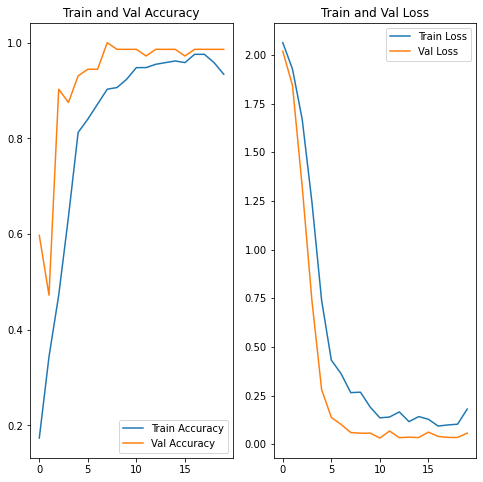

In [13]:
def plot():
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize = (8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label = 'Train Accuracy')
  plt.plot(epochs_range, val_acc, label = 'Val Accuracy')
  plt.legend(loc = 'lower right')
  plt.title('Train and Val Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label = 'Train Loss')
  plt.plot(epochs_range, val_loss, label = 'Val Loss')
  plt.legend(loc = 'upper right')
  plt.title('Train and Val Loss')
  plt.show()
  return

plot()

In [14]:
model.save('/content/model.h5')